In [1]:
import numpy as np
import pandas as pd

import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


In [2]:
os.getcwd()

'C:\\Users\\swsinha\\OneDrive - Nokia\\CLASS\\Flask deployment projects\\student campus placement'

In [3]:
df=pd.read_csv("Placement_Data_Full_Class.csv")

In [4]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.isnull().sum() # check null values

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

salary columns has 67 null values which need to fill.

In [8]:
import warnings
warnings.simplefilter("ignore")

In [9]:
def plotfillnagraph(col):
    plt.figure(figsize=(4,2))
    sns.distplot(df['salary'],kde=True,hist=False,label='Actual Salary',color='green')
    sns.distplot(df[col],kde=True,hist=False,label=col,color='black')

In [10]:
df['salary_mean']=df['salary'].fillna(df['salary'].mean())
df['salary_mode']=df['salary'].fillna(df['salary'].mode()[0])
df['salary_median']=df['salary'].fillna(df['salary'].median())

In [11]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_mode,salary_median
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.0,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.0,200000.0,200000.0


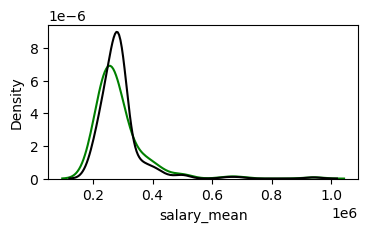

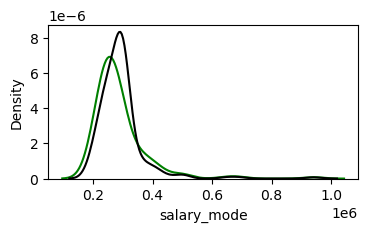

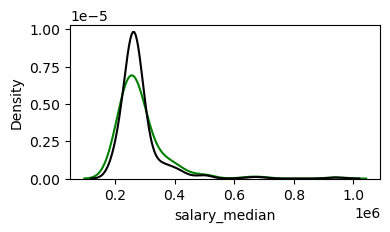

In [12]:
salarcol=['salary_mean','salary_mode','salary_median']
for col in salarcol:
    plotfillnagraph(col)
    

the salary deviation with mean can be consider to fillna values

In [13]:
#replacing null value with mean
df.fillna(df['salary'].mean(),inplace=True)
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_mode,salary_median
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,300000.0,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,425000.0


In [14]:
df=df.drop(columns=['salary_mean','salary_mode','salary_median'])

In [15]:
catvar=list[df.select_dtypes(include=['O']).columns]
numvar=list[df.select_dtypes(exclude=['O']).columns]
print(catvar,numvar)

list[Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')] list[Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')]


EDA

<Axes: xlabel='status', ylabel='count'>

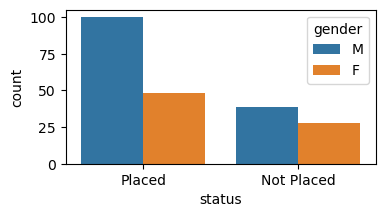

In [16]:
plt.figure(figsize=(4,2))
sns.countplot(x=df['status'],hue=df['gender'])


<Axes: ylabel='status'>

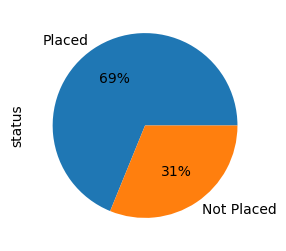

In [17]:
df['status'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(4,3))

69 % candidate are placed and 31 % are not placed
Male candidate placed are greater than female candidate

<Axes: xlabel='specialisation'>

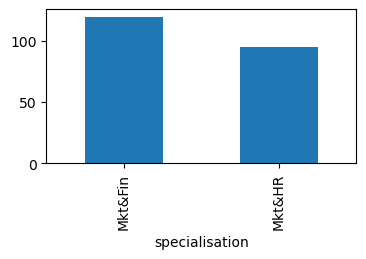

In [18]:
df.groupby(['specialisation'])['status'].count().plot(kind='bar',figsize=(4,2))

<Axes: ylabel='status'>

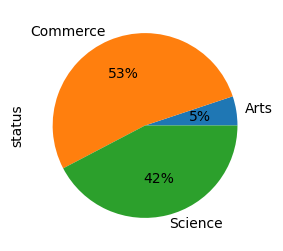

In [19]:
df.groupby(['hsc_s'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%',figsize=(5,3))

In [20]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

<Axes: ylabel='status'>

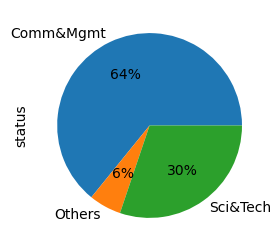

In [21]:
# Mkt&HR students placed
df1=df[(df['status']=='Placed')& (df['specialisation']=='Mkt&HR')]
df1.head()
df1.groupby(['degree_t'])['status'].count().plot(kind='pie',autopct='%1.0f%%',figsize=(5,3))

Number of Placed Cnadidate ,having specialisation -Mkt&HR with Comm & Mgmt in Degree are maximum i.e 64 % followed by Sci&Tech with 30%

<Axes: ylabel='status'>

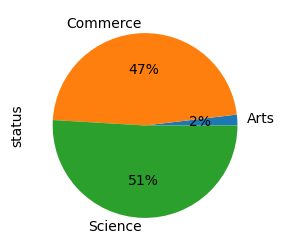

In [22]:
df1.groupby(['hsc_s'])['status'].count().plot(kind='pie',autopct='%1.0f%%',figsize=(5,3))

Number of Placed Cnadidate ,having specialisation -Mkt&HR with SCience in HSC are maximum i.e 51 % followed by commerce with 47%

In [23]:
df1.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
10,11,M,58.0,Central,61.0,Central,Commerce,60.0,Comm&Mgmt,Yes,62.0,Mkt&HR,60.85,Placed,260000.0


<Axes: xlabel='degree_p', ylabel='degree_t'>

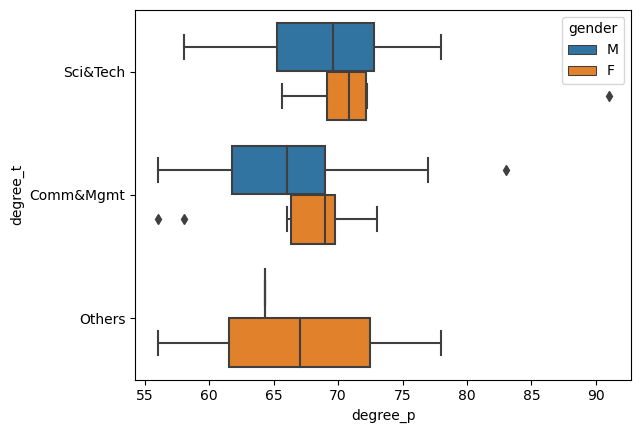

In [24]:
sns.boxplot(data=df1, x="degree_p", y="degree_t", hue="gender")

Female performance in degree was good as compaire to Male,specially in Sci&Tech


## Model Building

In [25]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [26]:
#from sklearn.preprocessing import LabelEncoder
#def label_transformation(x):
    #le=LabelEncoder()
    #le_encoded=le.fit_transform(x)
    #return le_encoded
    

In [27]:
catvar

list[Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')]

In [28]:
catergorial_columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex','specialisation', 'status']
#for x in catergorial_columns:
    #df_transformed[x]=  label_transformation(df[x])
    #df[x] = label_transformation(df[x])
    


In [29]:
def labelencode(le,col):
    
    df[col] = le.fit_transform(df[col])    
getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in catergorial_columns:
    labelencode(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))


In [30]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


As we have seen there is null value in salary as we konw salary will be know after placement , so for model  for campus placement droping sl_no and salary columns.

In [31]:
d2=df.drop(columns=['sl_no','salary'])
d2.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1


In [32]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

## Numerical Columns EDA

In [33]:
numvar
numvars=['ssc_p','hsc_p','degree_p', 'etest_p','mba_p','salary']


Distribution plots for col : ssc_p are shown ↓


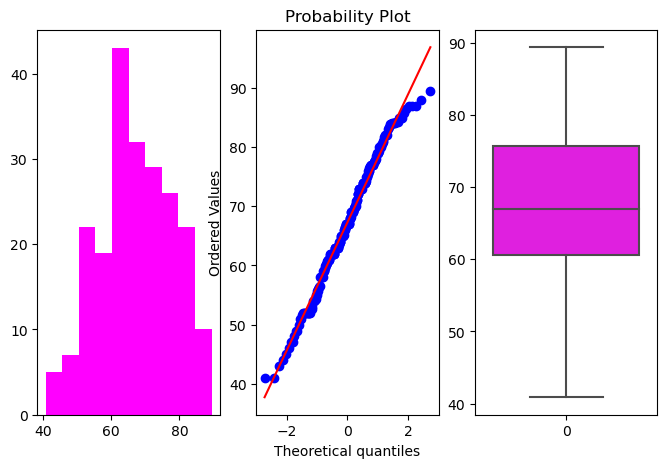

Distribution plots for col : hsc_p are shown ↓


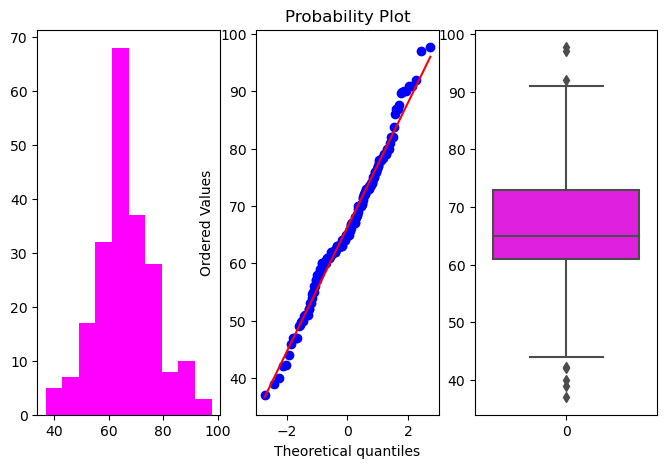

Distribution plots for col : degree_p are shown ↓


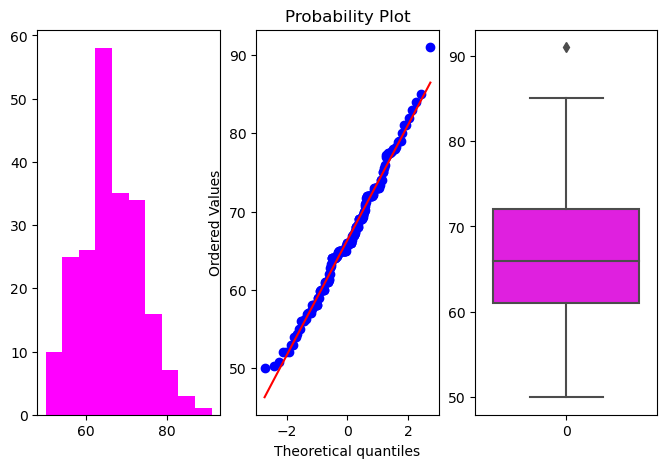

Distribution plots for col : etest_p are shown ↓


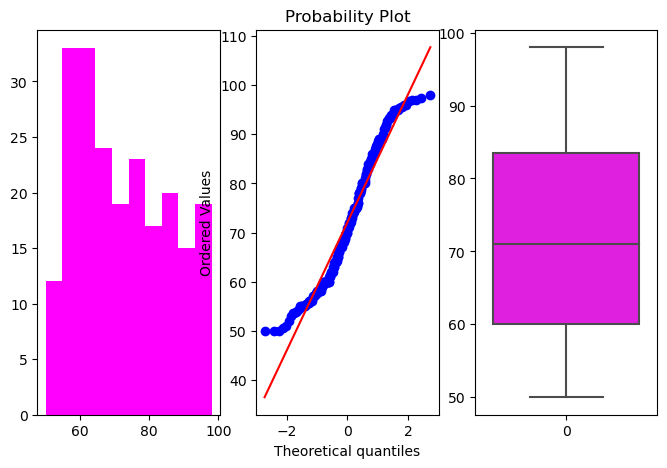

Distribution plots for col : mba_p are shown ↓


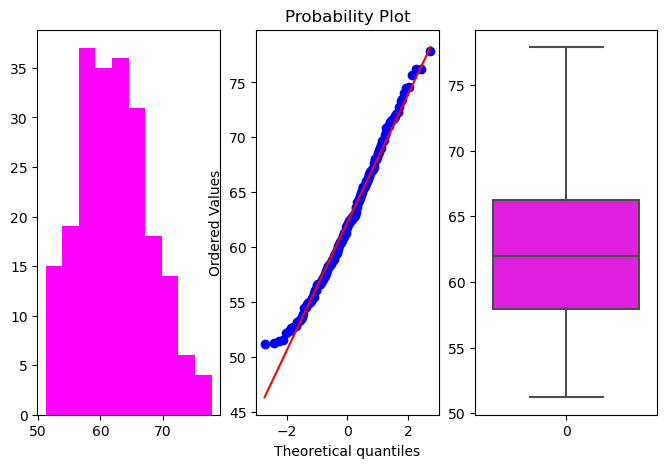

Distribution plots for col : salary are shown ↓


KeyError: 'salary'

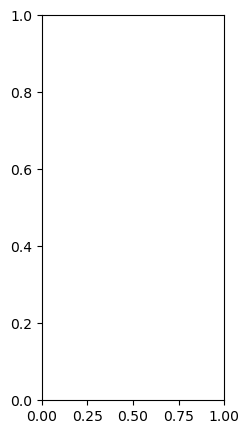

In [34]:
import scipy.stats as stats

def getplots(df,col):
    
    plt.figure(figsize=(8,5))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col],color='magenta')
    
    plt.show()
    
    
for col in numvars:
    print(f'Distribution plots for col : {col} are shown ↓')
    getplots(d2,col)
    print('='*10)

In [35]:
# Feature Selection

<Axes: >

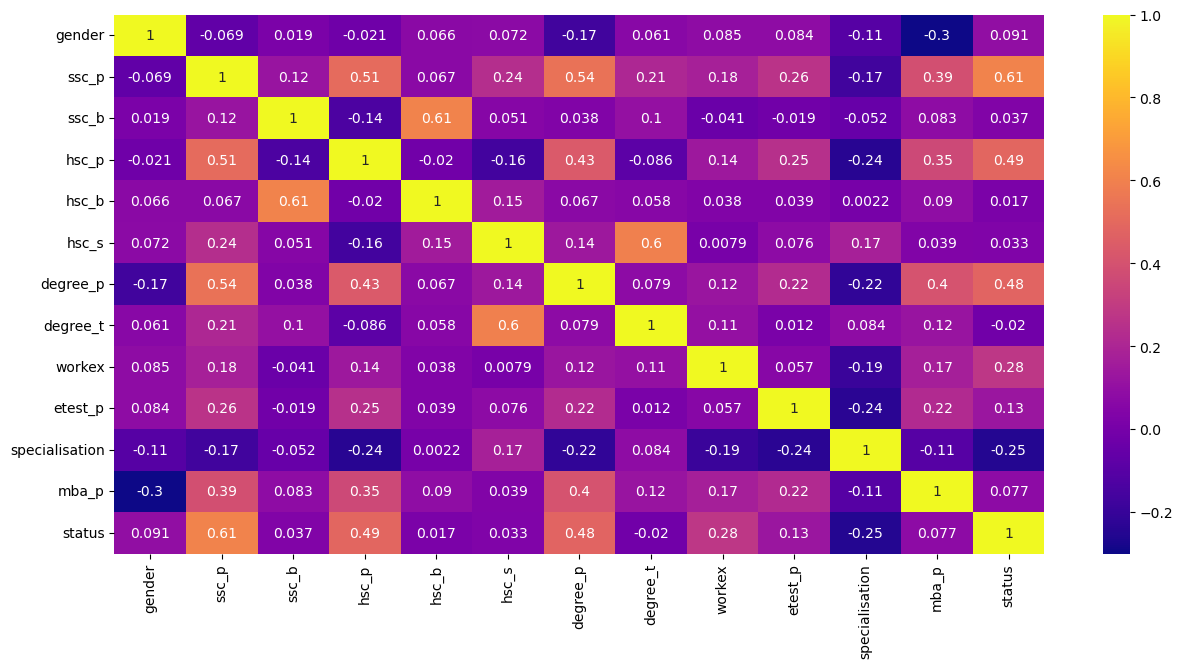

In [36]:
#checking for tightly correlated features

plt.figure(figsize=(15,7))
sns.heatmap(d2.corr(),annot=True,cmap='plasma')

In [37]:
d2.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1


In [38]:
x=d2.iloc[:,:-1]
y=d2['status']

In [41]:
x.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [42]:
'''
From the above DF we notice that gender,specialisation,degree_t,workex are the 
categorical columns and they make sense isn't it?,for any placement drive
students are first filtered on basis of their boards,sem scores which in this case are {mba_p,ssc_p,degree_p,hsc_p}
and then workexperience also matters a lot!,then specialisation as well,gender is also important
because now-a-days few companies focus on women empowerment,so yes,all the features make perfect sense!

'''
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [ ]:
## extratrees classifier

from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(train,test)

featbar = pd.Series(ec.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind = 'barh')

featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize = (15,7))

In [ ]:
# mutual classif

from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(train,test)
ax = pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind = 'barh')

In [ ]:
pd.Series(mc,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7))

In [ ]:
'''
Selecting the top 10 contributing features in both cases
and then we will do the intersection of both the results
so that we will get atleast top 5 most contributing features!

'''

featcol = list(featbar.nlargest(10).index)
mutclasif = list(ax.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

In [ ]:
'''
From the above DF we notice that gender,specialisation,degree_t,workex are the 
categorical columns and they make sense isn't it?,for any placement drive
students are first filtered on basis of their boards,sem scores which in this case are {mba_p,ssc_p,degree_p,hsc_p}
and then workexperience also matters a lot!,then specialisation as well,gender is also important
because now-a-days few companies focus on women empowerment,so yes,all the features make perfect sense!

'''
getmappings

In [43]:
train = x[['gender','specialisation','degree_t','workex','ssc_p','hsc_p','degree_p','mba_p']]
train.columns =['Gender','Specialisation','Techinal Degree','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,2,0,67.00,91.00,58.00,58.80
1,1,0,2,1,79.33,78.33,77.48,66.28
2,1,0,0,0,65.00,68.00,64.00,57.80
3,1,1,2,0,56.00,52.00,52.00,59.43
4,1,0,0,0,85.80,73.60,73.30,55.50


In [44]:
d2.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1


In [45]:
x.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [46]:
#Selecting and # renaming the cols for model
train = x[['gender','specialisation','degree_t','workex','ssc_p','hsc_p','degree_p','mba_p']]
train.columns = ['Gender','Specialisation','Techinal Degree','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()


,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,2,0,67.00,91.00,58.00,58.80
1,1,0,2,1,79.33,78.33,77.48,66.28
2,1,0,0,0,65.00,68.00,64.00,57.80
3,1,1,2,0,56.00,52.00,52.00,59.43
4,1,0,0,0,85.80,73.60,73.30,55.50


In [47]:
train['Techinal Degree'].value_counts()

0    145
2     59
1     11
Name: Techinal Degree, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.2,random_state=21)
X_train.shape,X_test.shape

((172, 8), (43, 8))

In [52]:
from sklearn.svm import SVC

In [49]:
models=[("LR",LogisticRegression()),
       ("Dt",DecisionTreeClassifier()),
       ("Rf",RandomForestClassifier()),
       ("SVM",SVC())]

In [50]:
final_result=[]
for name,model in models:
    model.fit(X_train,y_train) # train the model
    score=model.score(X_test,y_test)
    y_predicted = model.predict(X_test)
    
    
    final_result.append((name,score))
final_result

[('LR', 0.8604651162790697),
 ('Dt', 0.7674418604651163),
 ('Rf', 0.813953488372093),
 ('SVM', 0.7906976744186046)]

## Hyperparameter Tuning

In [55]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [ ]:
scores = []
for model_name,mp in params.items():
    
     grid_search= GridSearchCV(mp['model'],param_grid=mp['params'],cv=5,n_jobs=-1,scoring='accuracy')
     grid_search.fit(X_train,y_train)
     scores.append({
        'model_name':model_name,
        'best_score':grid_search.best_score_,
        'best_estimator':grid_search.best_estimator_})

In [ ]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

In [ ]:
scores

In [56]:
# random forest model
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


rf = RandomForestClassifier()#ccp_alpha=0.02, max_depth=30, max_features='sqrt',
                         #min_samples_leaf=2, min_samples_split=12,
                         #n_estimators=267)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))

0.813953488372093


In [57]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73        17
           1       0.80      0.92      0.86        26

    accuracy                           0.81        43
   macro avg       0.82      0.79      0.80        43
weighted avg       0.82      0.81      0.81        43



# Model Testing

In [69]:
df.iloc[5:6]


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
5,6,1,55.0,1,49.8,1,2,67.25,2,1,55.0,0,51.58,0,288655.405405


In [65]:
import joblib

joblib.dump(rf,open("student_placement_v1.0.model","wb"))
joblib.dump(le,open("student_placement_v1.0.encoder","wb"))


In [67]:
model1= joblib.load(open("student_placement_v1.0.model","rb"))
encoder=joblib.load(open("student_placement_v1.0.encoder","rb"))

In [73]:
my_data=train.iloc[5:6]
my_data


,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
5,1,0,2,1,55.0,49.8,67.25,51.58


In [74]:
model1.predict(my_data)


array([0])

## Probability prediction for student getting placed

In [77]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))
    
predicted

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [79]:
resultdf = train.copy()
resultdf['Actual'] = np.array(y)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted
0,1,1,2,0,67.00,91.00,58.00,58.80,1,1
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0
4,1,0,0,0,85.80,73.60,73.30,55.50,1,1


In [80]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [81]:
resultdf['Predicted'].value_counts()

1    152
0     63
Name: Predicted, dtype: int64

In [82]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

### Predicted Probability

In [83]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))
    
predicted

[array([[0.16, 0.84]]),
 array([[0., 1.]]),
 array([[0.05, 0.95]]),
 array([[1., 0.]]),
 array([[0., 1.]]),
 array([[0.9, 0.1]]),
 array([[0.86, 0.14]]),
 array([[0.01, 0.99]]),
 array([[0.01, 0.99]]),
 array([[0.35, 0.65]]),
 array([[0.19, 0.81]]),
 array([[0.01, 0.99]]),
 array([[0.89, 0.11]]),
 array([[0.24, 0.76]]),
 array([[0.93, 0.07]]),
 array([[0.01, 0.99]]),
 array([[0.03, 0.97]]),
 array([[0.69, 0.31]]),
 array([[0.8, 0.2]]),
 array([[0.21, 0.79]]),
 array([[0.14, 0.86]]),
 array([[0.08, 0.92]]),
 array([[0.14, 0.86]]),
 array([[0.06, 0.94]]),
 array([[0.02, 0.98]]),
 array([[0.94, 0.06]]),
 array([[0., 1.]]),
 array([[0.12, 0.88]]),
 array([[0.01, 0.99]]),
 array([[0.75, 0.25]]),
 array([[0.03, 0.97]]),
 array([[0.77, 0.23]]),
 array([[0.1, 0.9]]),
 array([[0.03, 0.97]]),
 array([[0.99, 0.01]]),
 array([[0.02, 0.98]]),
 array([[0.99, 0.01]]),
 array([[0.06, 0.94]]),
 array([[0.1, 0.9]]),
 array([[0.05, 0.95]]),
 array([[0.11, 0.89]]),
 array([[0.72, 0.28]]),
 array([[0.93, 0

In [84]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.16, 0.84]), 0.16, 0.84)

In [85]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,Gender,Specialisation,Techinal Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,1,2,0,67.00,91.00,58.00,58.80,1,1,0.16,0.84
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1,0.00,1.00
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1,0.05,0.95
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0,1.00,0.00
4,1,0,0,0,85.80,73.60,73.30,55.50,1,1,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,80.60,82.00,77.60,74.49,1,1,0.04,0.96
211,1,0,2,0,58.00,60.00,72.00,53.62,1,1,0.23,0.77
212,1,0,0,1,67.00,67.00,73.00,69.72,1,1,0.03,0.97
213,0,1,0,0,74.00,66.00,58.00,60.23,1,1,0.10,0.90


### Conclusions
 + 4 records were missclassified,resulting in the accuracy of 81% on testing data
 + Random Forest model gave the best results
